## Análise de Empregabilidade - CAGED

### Isabelle Oliveira
### Gabriel Borges

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import numpy as np

In [2]:
def plot(get_chart, xlabel=None, ylabel=None, title=None , figsize=(10,6)):
    titledict = {'fontweight':'bold', 'fontsize': 15}
    labeldict = {'fontsize': 13}
    plt.figure(figsize = figsize)
    ax = get_chart()
    title and ax.set_title(title + "\n", fontdict=titledict)
    xlabel and ax.set_xlabel(xlabel, fontdict=labeldict)
    xlabel and ax.set_ylabel(ylabel, fontdict=labeldict)
    plt.show()

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
fields = ['competencia','secao','graudeinstrucao','idade','racacor','sexo','tipomovimentacao','salario']
df = pd.read_csv('../input/cageddata/CAGED2020.csv', delimiter = ";", usecols=fields)
#df = pd.read_csv('CAGED2020\CAGED2020.csv', delimiter = ";", low_memory=False)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head()

,competencia,secao,graudeinstrucao,idade,racacor,sexo,tipomovimentacao,salario
0,202003,Q,9.0,24.0,1.0,3.0,40.0,1350.000000
1,202003,C,7.0,29.0,3.0,1.0,31.0,1500.000000
2,202003,M,9.0,30.0,6.0,3.0,31.0,2800.000000
3,202003,G,7.0,46.0,1.0,1.0,31.0,2103.199951
4,202003,G,7.0,28.0,1.0,1.0,31.0,1889.599976


In [6]:
df.isnull().sum()

competencia           0
secao                 1
graudeinstrucao       1
idade                51
racacor               1
sexo                  1
tipomovimentacao      1
salario             265
dtype: int64

In [7]:
df.dropna(inplace = True)

In [8]:
df['descsexo']= df['sexo'].map({1: 'Masculino',3 :'Feminino', 9: 'Nao Identificado'})
df['descraca'] = df['racacor'].map({1: 'Branca',2: 'Preta',3: 'Parda', 4: 'Amarela',5 : 'Indigena',6:'Nao Informada',  9: 'Nao Identificado'})
df['desctipomovimentação'] = df['tipomovimentacao'].map({
10:'Admissão por Primeiro Emprego',
20:'Admissão por Reemprego', 
25:'Admissão por contrato trabalho prazo determinado',
31:'Desligamento por Demissão sem Justa Causa', 
32:'Desligamento por Demissão com Justa Causa', 
33:'Culpa Recíproca',
35:'Admissão por Reintegraçao', 
40:'Desligamento a Pedido',
43:'Término contrato trabalho prazo determinado',
45:'Desligamento por Término de Contrato',
50:'Desligamento por Aposentadoria', 
60:'Desligamento por morte',
70:'Admissão por Transferência', 
80:'Desligamento por Transferência', 
90:'Desliamento por Acordo Empregado e Empregador',
98:'Desligamento de Tipo Ignorado',
99:'Não Identificado'})

In [9]:
df.head(3)

,competencia,secao,graudeinstrucao,idade,racacor,sexo,tipomovimentacao,salario,descsexo,descraca,desctipomovimentação
0,202003,Q,9.0,24.0,1.0,3.0,40.0,1350.0,Feminino,Branca,Desligamento a Pedido
1,202003,C,7.0,29.0,3.0,1.0,31.0,1500.0,Masculino,Parda,Desligamento por Demissão sem Justa Causa
2,202003,M,9.0,30.0,6.0,3.0,31.0,2800.0,Feminino,Nao Informada,Desligamento por Demissão sem Justa Causa


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24753391 entries, 0 to 24753704
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   competencia           object 
 1   secao                 object 
 2   graudeinstrucao       float64
 3   idade                 float64
 4   racacor               float64
 5   sexo                  float64
 6   tipomovimentacao      float64
 7   salario               float64
 8   descsexo              object 
 9   descraca              object 
 10  desctipomovimentação  object 
dtypes: float64(6), object(5)
memory usage: 2.2+ GB


In [11]:
conditions = [
    (df['tipomovimentacao'].isin([10,20,25,35,70])),
    (df['tipomovimentacao'].isin([31,32,33,40,43,45,50,60,80,90,98])),
    (df['tipomovimentacao'].isin([99]))
    ]

values = ['Admitido', 'Desligado', 'Não identificado']

df['movimento'] = np.select(conditions, values)

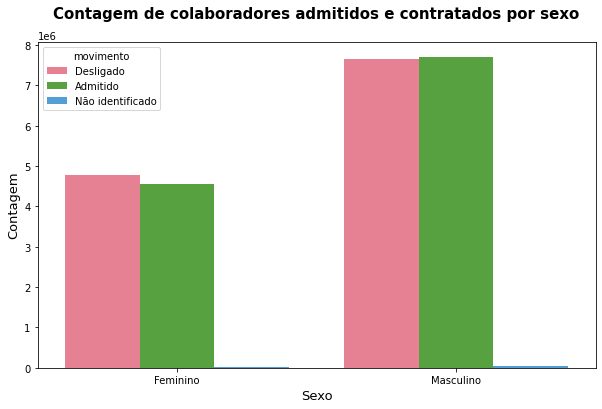

In [12]:
plot(
    get_chart = lambda: sns.countplot(x='descsexo', hue='movimento',data = df, palette='husl'),
    title = "Contagem de colaboradores admitidos e contratados por sexo",
    xlabel = "Sexo",
    ylabel = "Contagem",
)

In [13]:
conditions = [
    ((df['idade'] >= 0) & (df['idade'] <= 19)),
    ((df['idade'] >= 20) & (df['idade'] <= 59)),
    (df['idade'] >= 60)
    ]

values = ['Jovem', 'Adulto', 'Idoso']

df['faixa_etaria'] = np.select(conditions, values)

In [14]:
df[df['faixa_etaria']=='0']['idade']

Series([], Name: idade, dtype: float64)

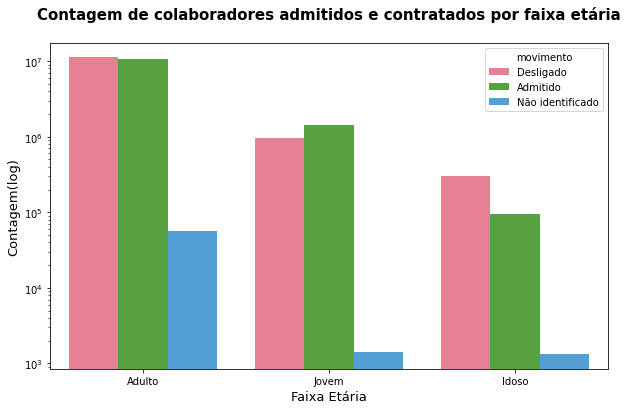

In [15]:
def get_chart():
    ax = sns.countplot(x='faixa_etaria',hue='movimento',data = df, palette='husl')
    ax.set(yscale="log")
    return ax
plot(
    get_chart = get_chart,
    xlabel = "Faixa Etária",
    ylabel = "Contagem(log)",
    title = "Contagem de colaboradores admitidos e contratados por faixa etária" 
)

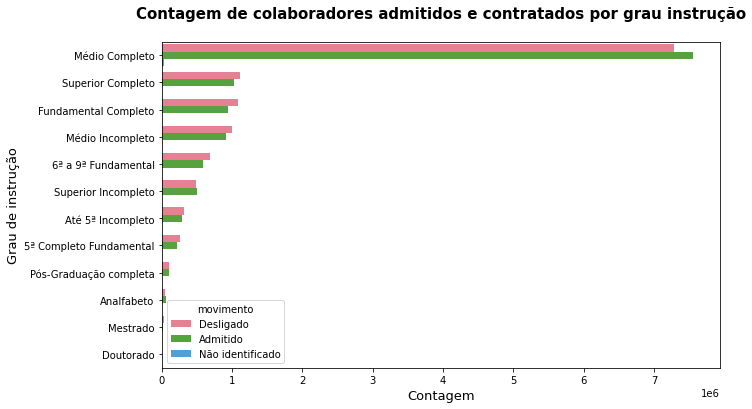

In [16]:
def get_chart():
    labeled_sectors = df.loc[:, ['movimento', 'graudeinstrucao']]
    labeled_sectors['label'] = df['graudeinstrucao'].map({
        1:"Analfabeto",
        2:"Até 5ª Incompleto",
        3:"5ª Completo Fundamental",
        4:"6ª a 9ª Fundamental",
        5:"Fundamental Completo",
        6:"Médio Incompleto",
        7:"Médio Completo",
        8:"Superior Incompleto",
        9:"Superior Completo",
        10:"Mestrado",
        11:"Doutorado",
        80:"Pós-Graduação completa",
        99:"Não Identificado",
    })
    order = labeled_sectors['label'].value_counts().index
    ax = sns.countplot(y='label', hue='movimento',data=labeled_sectors,order=order, palette='husl')
    return ax

plot(
    get_chart = get_chart,
    title = "Contagem de colaboradores admitidos e contratados por grau instrução",
    ylabel = "Grau de instrução",
    xlabel = "Contagem",
)

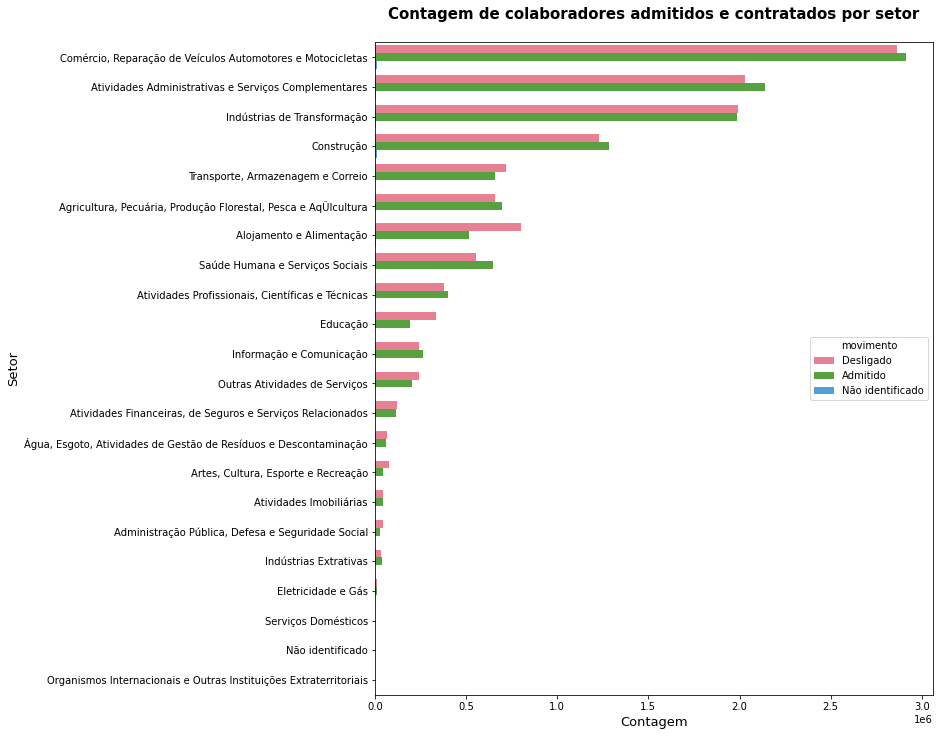

In [17]:
def get_chart():
    labeled_sectors = df.loc[:, ['movimento', 'secao']]
    labeled_sectors['label'] = df['secao'].map({
        "A":"Agricultura, Pecuária, Produção Florestal, Pesca e AqÜIcultura",
        "B":"Indústrias Extrativas",
        "C":"Indústrias de Transformação",
        "D":"Eletricidade e Gás",
        "E":"Água, Esgoto, Atividades de Gestão de Resíduos e Descontaminação",
        "F":"Construção",
        "G":"Comércio, Reparação de Veículos Automotores e Motocicletas",
        "H":"Transporte, Armazenagem e Correio",
        "I":"Alojamento e Alimentação",
        "J":"Informação e Comunicação",
        "K":"Atividades Financeiras, de Seguros e Serviços Relacionados",
        "L":"Atividades Imobiliárias",
        "M":"Atividades Profissionais, Científicas e Técnicas",
        "N":"Atividades Administrativas e Serviços Complementares",
        "O":"Administração Pública, Defesa e Seguridade Social",
        "P":"Educação",
        "Q":"Saúde Humana e Serviços Sociais",
        "R":"Artes, Cultura, Esporte e Recreação",
        "S":"Outras Atividades de Serviços",
        "T":"Serviços Domésticos",
        "U":"Organismos Internacionais e Outras Instituições Extraterritoriais",
        "Z":"Não identificado",
    })
    order = labeled_sectors['label'].value_counts().index
    return sns.countplot(y='label', hue='movimento',data=labeled_sectors, order= order, palette='husl')
plot(
    get_chart=get_chart,
    title="Contagem de colaboradores admitidos e contratados por setor",
    ylabel= "Setor",
    xlabel= "Contagem",
    figsize=(10,12)
)

In [18]:
from IPython.display import Markdown
df_admitidos = df[df['movimento']=='Admitido']
men_mean_income = df_admitidos[df_admitidos['sexo']==1]['salario'].mean()
women_mean_income = df_admitidos[df_admitidos['sexo']==3]['salario'].mean()
gender_diff_income = abs(men_mean_income - women_mean_income)
Markdown("""# Diferença da média salarial entre homens e mulheres admitidos
#### Salário médio de homens admitidos: {0:,.2f}    
#### Salário médio de mulheres admitidas: {1:,.2f}
#### Diferença: {2:,.2f}

""".format(men_mean_income, women_mean_income, gender_diff_income))

# Diferença da média salarial entre homens e mulheres admitidos
#### Salário médio de homens admitidos: 44,610.80    
#### Salário médio de mulheres admitidas: 3,336.22
#### Diferença: 41,274.58



In [19]:
from IPython.display import Markdown
df_admitidos = df[df['movimento']=='Admitido']
men_mean_income = df_admitidos[df_admitidos['sexo']==1]['salario'].median()
women_mean_income = df_admitidos[df_admitidos['sexo']==3]['salario'].median()
gender_diff_income = abs(men_mean_income - women_mean_income)
Markdown("""# Diferença da média salarial entre homens e mulheres admitidos(mediana)
#### Salário médio de homens admitidos: {0:,.2f}    
#### Salário médio de mulheres admitidas: {1:,.2f}
#### Diferença: {2:,.2f}

""".format(men_mean_income, women_mean_income, gender_diff_income))

# Diferença da média salarial entre homens e mulheres admitidos(mediana)
#### Salário médio de homens admitidos: 1,389.15    
#### Salário médio de mulheres admitidas: 1,280.00
#### Diferença: 109.15



### Quantidade de admissões/demissões por gênero no período da pandemia

In [20]:
from IPython.display import Markdown
df_admitidos = df[df['movimento']=='Admitido']
df_desligados = df[df['movimento']=='Desligado']

hired_men = df_admitidos[df_admitidos['sexo']==1]['sexo'].count()
hired_women = df_admitidos[df_admitidos['sexo']==3]['sexo'].count()
hired_gender_diff = abs(hired_men - hired_women)

fired_men = df_desligados[df_desligados['sexo']==1]['sexo'].count()
fired_women = df_desligados[df_desligados['sexo']==3]['sexo'].count()
fired_gender_diff = abs(fired_men - fired_women)

Markdown("""### Quantidade de admissões/demissões por gênero no período da pandemia
| |Homens|Mulheres| Diferença |
|---| ---  |   ---  | --- |
|Adimitidos | {0:,} | {1:,} | {2:,} |
|Deslligados| {3:,} | {4:,} | {5:,} |

""".format(hired_men, hired_women, hired_gender_diff, fired_men, fired_women, fired_gender_diff))

### Quantidade de admissões/demissões por gênero no período da pandemia
| |Homens|Mulheres| Diferença |
|---| ---  |   ---  | --- |
|Adimitidos | 7,694,527 | 4,554,482 | 3,140,045 |
|Deslligados| 7,659,170 | 4,786,060 | 2,873,110 |



### Diferença salarial entre homens e mulheres desligados

In [21]:
df_desligados = df[df['movimento']=='Desligado']

fired_men_income = df_desligados[df_desligados['sexo']==1]['salario'].mean()
fired_women_income = df_desligados[df_desligados['sexo']==3]['salario'].mean()
fired_gender_diff = abs(fired_men_income - fired_women_income)

Markdown("""# Diferença salarial entre homens e mulheres desligados
#### Salário médio de homens admitidos: {0:,.2f}    
#### Salário médio de mulheres admitidas: {1:,.2f}
#### Diferença: {2:,.2f}

""".format(fired_men_income, fired_women_income, fired_gender_diff))

# Diferença salarial entre homens e mulheres desligados
#### Salário médio de homens admitidos: 8,827.04    
#### Salário médio de mulheres admitidas: 3,232.70
#### Diferença: 5,594.35



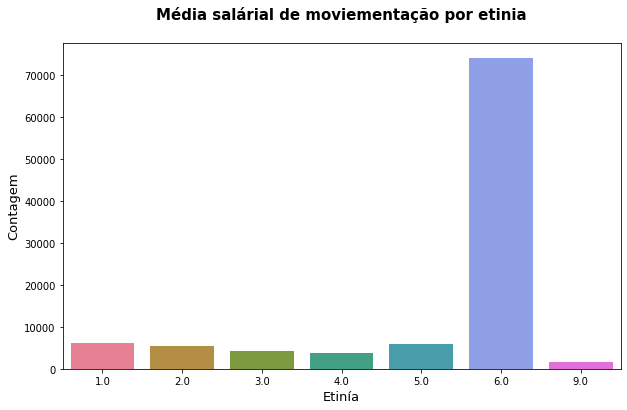

In [22]:
race_mean_income = df.groupby(['racacor'])['salario'].mean()

def get_chart():
    labeled_sectors = df.loc[:, ['movimento', 'racacor']]
    labeled_sectors['label'] = df['racacor'].map({
        1:"Branca",
        2:"Preta",
        3:"Parda",
        4:"Amarela",
        5:"Indígena",
        6:"Não informada",
        9:"Não Identificado"
    })
    order = labeled_sectors['label'].value_counts().index
    ax = sns.barplot(y= race_mean_income.values, x= race_mean_income.index,data =labeled_sectors,  palette='husl')
    return ax
plot(
    get_chart,
    title="Média salárial de moviementação por etinia",
    xlabel="Etinía",
    ylabel="Contagem",
)

### Causas de demissão formalizadas pelos empregadores distribuídas por sexo, raça/cor e faixa etária

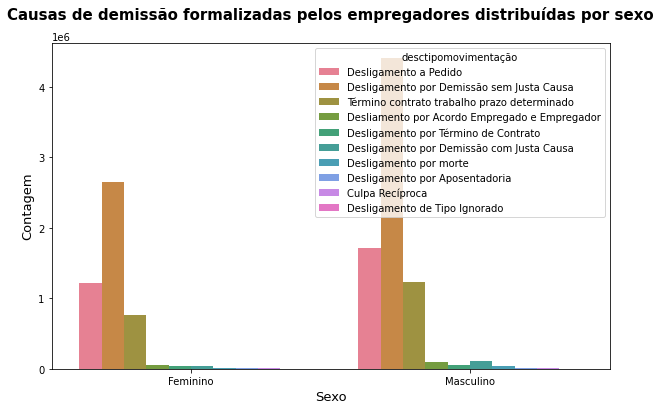

In [23]:
plot(
    lambda: sns.countplot(hue='desctipomovimentação', x='descsexo',data = df_desligados, palette='husl'),
    title="Causas de demissão formalizadas pelos empregadores distribuídas por sexo",
    xlabel="Sexo",
    ylabel="Contagem",
)

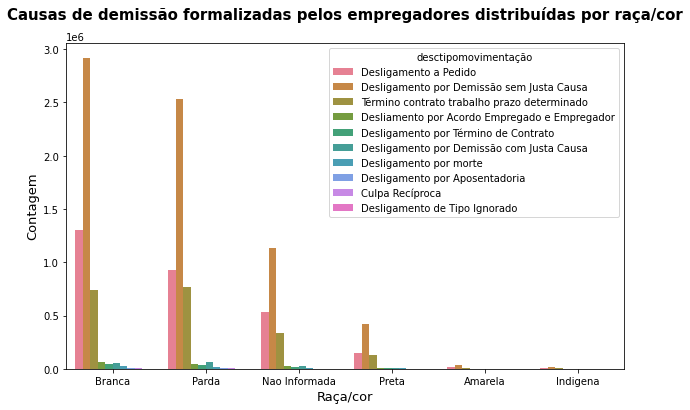

In [24]:
plot(
    lambda: sns.countplot(hue='desctipomovimentação', x='descraca',data = df_desligados, palette='husl'),
    title="Causas de demissão formalizadas pelos empregadores distribuídas por raça/cor",
    xlabel="Raça/cor",
    ylabel="Contagem"
)

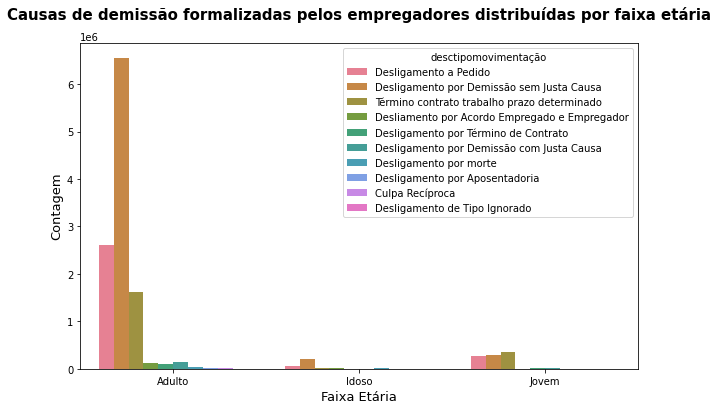

In [25]:
plot(
    lambda: sns.countplot(hue='desctipomovimentação', x='faixa_etaria',data = df_desligados, palette='husl'),
    title="Causas de demissão formalizadas pelos empregadores distribuídas por faixa etária",
    xlabel="Faixa Etária",
    ylabel="Contagem",
)